In [1]:
# imports, open the data and initial setup
import mass
import numpy as np
import pylab as plt
from mass.off import ChannelGroup, getOffFileListFromOneFile, Channel, labelPeak, labelPeaks
import os
import ebit_util
# %matplotlib widget


d = "/home/pcuser/data"
date = "20221215"                       #date
rn = "0001"                             #run number, can be found in dastard command 
state1 = "B"
fl = getOffFileListFromOneFile(os.path.join(d, f"{date}", f"{rn}", 
f"{date}_run{rn}_chan1.off"), maxChans=300)
data = ChannelGroup(fl)             #all of the channels 
data.setDefaultBinsize(0.4)

In [2]:
def refresh_and_print_if_worked():
    old = np.sum([len(dslocal) for dslocal in data.values()])
    data.refreshFromFiles()
    new = np.sum([len(dslocal) for dslocal in data.values()])
    if new > old:
        print(f"refresh worked, now have {new} pulses vs {old} before")
    else:
        print(f"refresh FAILED, now have {new} pulses vs {old} before")

Laplace entropy before/middle/after: 5.6426, 5.6174 5.6100 (17+17 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.5261, 5.5066 5.5043 (20+20 iterations, 4 phase groups)
Laplace entropy before/middle/after: 5.4125, 5.4098 5.4097 (75+84 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.4692, 5.4633 5.4633 (50+38 iterations, 9 phase groups)
Laplace entropy before/middle/after: 5.6128, 5.5849 5.5837 (29+29 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.6975, 5.6185 5.6127 (35+33 iterations, 6 phase groups)


<AxesSubplot:title={'center':'20221215_run0001 chan1\ncutRecipeName=cutNone'}, xlabel='pretriggerMean', ylabel='energy'>

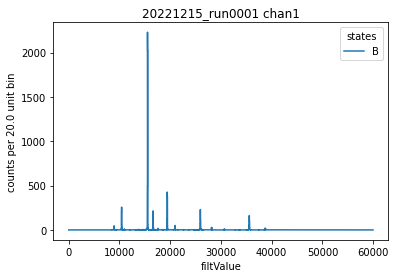

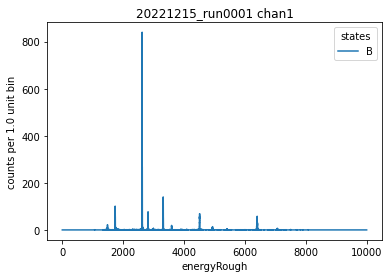

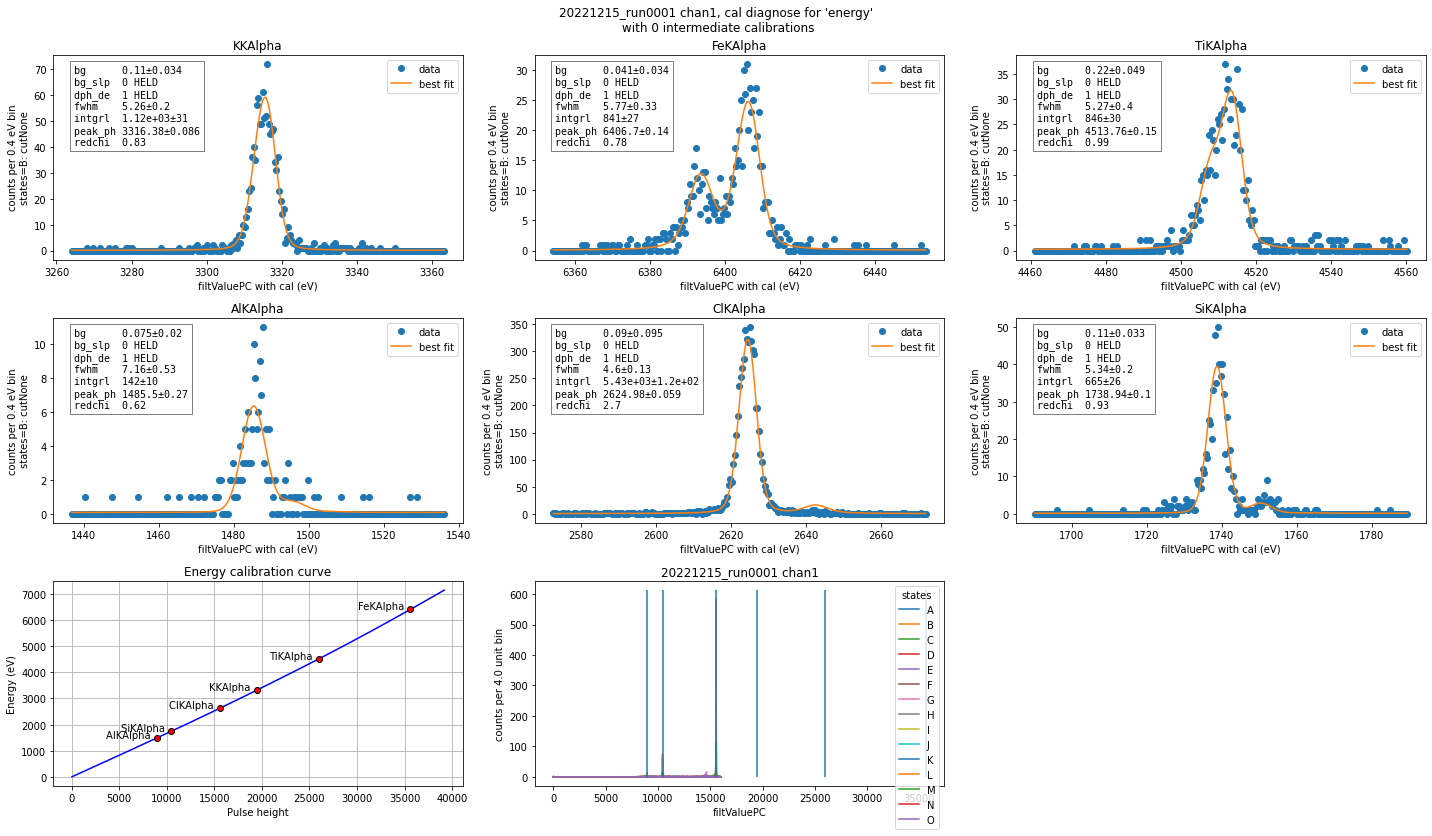

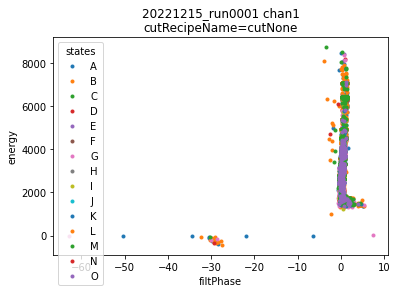

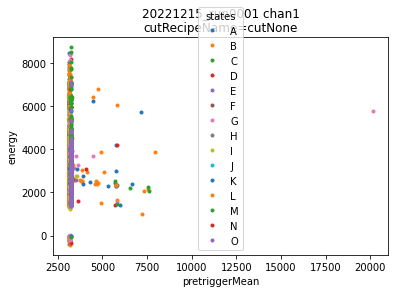

In [3]:
#calibrate and inspect one channel
ds = data[1]                       #selection of individual channel
ds.plotHist( np.arange(0, 60000, 20), "filtValue", coAddStates=False, states=state1 )   #states=None by default uses all states


ds.learnDriftCorrection(overwriteRecipe=True, states=state1)
#ds.plotHist( np.arange(0, 60000, 20), "filtValueDC", coAddStates=False, states=None )   #states=None by default uses all states
ds.calibrationPlanInit("filtValueDC")
ds.calibrationPlanAddPoint(19431, "KKAlpha", states=state1)
ds.calibrationPlanAddPoint(35592, "FeKAlpha", states=state1)
ds.calibrationPlanAddPoint(25950, "TiKAlpha", states=state1)
ds.calibrationPlanAddPoint(8947, "AlKAlpha", states=state1)
ds.calibrationPlanAddPoint(15549, "ClKAlpha", states=state1)
ds.calibrationPlanAddPoint(10447, "SiKAlpha", states=state1)


ds.plotHist( np.arange(0, 10000, 1), "energyRough", coAddStates=False, states=state1 )   #states=None by default uses all states
#ds.plotAvsB("relTimeSec", "pretriggerMean")
#ds.plotAvsB("relTimeSec", "energyRough")
#plt.ylim(1100,1600)
ds.learnPhaseCorrection(linePositionsFunc = lambda ds: ds.recipes["energyRough"].f._ph)


#ds.plotHist( np.arange(0,8500,2), "energyRough", coAddStates=False, states=state1)

ds.calibrateFollowingPlan("filtValuePC")
ds.diagnoseCalibration()
ds.plotAvsB("filtPhase", "energy")
ds.plotAvsB("pretriggerMean","energy")

In [4]:
# calibrate all channels
data.learnDriftCorrection(overwriteRecipe=True, states=state1)
data.alignToReferenceChannel(ds, "filtValueDC", np.arange(0,40000,30))
data.learnPhaseCorrection(linePositionsFunc = lambda ds: ds.recipes["energyRough"].f._ph)
data.calibrateFollowingPlan("filtValuePC")


MARK BAD 20221215_run0001 chan110: reason=Calibration points are not monotone:
PH:     [15. 15. 15.]
Energy: [19425. 35595. 25935.] during alignToReferenceChannel
extraInfo: Calibration points are not monotone:
PH:     [15. 15. 15.]
Energy: [19425. 35595. 25935.]
Laplace entropy before/middle/after: 5.6426, 5.6174 5.6100 (17+17 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.5261, 5.5066 5.5043 (20+20 iterations, 4 phase groups)
Laplace entropy before/middle/after: 5.4125, 5.4098 5.4097 (75+84 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.4692, 5.4633 5.4633 (50+38 iterations, 9 phase groups)
Laplace entropy before/middle/after: 5.6128, 5.5849 5.5837 (29+29 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.6975, 5.6185 5.6127 (35+33 iterations, 6 phase groups)

MARK BAD 20221215_run0001 chan1: reason=recipeName=filtValuePC already in self.craftedIngredients with keys=['relTimeSec', 'filtPhase', 'cutNone', 'filtValueDC', 'energy

Laplace entropy before/middle/after: 5.3940, 5.3935 5.3935 (108+82 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.4617, 5.4603 5.4604 (64+43 iterations, 9 phase groups)
Laplace entropy before/middle/after: 5.5077, 5.5027 5.5027 (40+25 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.6004, 5.5898 5.5892 (36+31 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.5175, 5.4997 5.4951 (16+16 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.4430, 5.4354 5.4352 (22+19 iterations, 4 phase groups)
Laplace entropy before/middle/after: 5.3508, 5.3500 5.3500 (95+77 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.4007, 5.3991 5.3989 (58+36 iterations, 8 phase groups)
Laplace entropy before/middle/after: 5.4525, 5.4399 5.4389 (26+23 iterations, 5 phase groups)
Laplace entropy before/middle/after: 5.5825, 5.5407 5.5384 (37+31 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.5950, 5.5744 5.569

Laplace entropy before/middle/after: 5.5747, 5.5089 5.5046 (34+33 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.5285, 5.5170 5.5159 (31+16 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.4150, 5.4146 5.4147 (42+21 iterations, 5 phase groups)
Laplace entropy before/middle/after: 5.3170, 5.3159 5.3159 (89+71 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.3799, 5.3780 5.3780 (66+35 iterations, 8 phase groups)
Laplace entropy before/middle/after: 5.4712, 5.4626 5.4623 (34+27 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.5175, 5.4943 5.4931 (35+29 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.3981, 5.3876 5.3846 (28+15 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.3854, 5.3839 5.3839 (23+22 iterations, 5 phase groups)
Laplace entropy before/middle/after: 5.3089, 5.3034 5.3033 (72+60 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.3625, 5.3568 5.3565

Laplace entropy before/middle/after: 5.5053, 5.5036 5.5033 (61+37 iterations, 9 phase groups)
Laplace entropy before/middle/after: 5.5964, 5.5865 5.5862 (28+28 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.6424, 5.6221 5.6205 (40+30 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.5964, 5.5851 5.5810 (16+17 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.5524, 5.5515 5.5518 (32+19 iterations, 4 phase groups)
Laplace entropy before/middle/after: 5.4616, 5.4600 5.4600 (104+66 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.5335, 5.5299 5.5299 (49+33 iterations, 8 phase groups)
Laplace entropy before/middle/after: 5.6043, 5.5883 5.5876 (34+30 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.7228, 5.6511 5.6466 (35+33 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.5256, 5.4925 5.4872 (20+17 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.4242, 5.4244 5.4241

Laplace entropy before/middle/after: 5.5300, 5.5028 5.4963 (24+17 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.3945, 5.3910 5.3910 (26+19 iterations, 4 phase groups)
Laplace entropy before/middle/after: 5.3145, 5.3128 5.3128 (73+76 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.3511, 5.3470 5.3469 (59+40 iterations, 8 phase groups)
Laplace entropy before/middle/after: 5.4875, 5.4691 5.4685 (31+27 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.5827, 5.5308 5.5271 (35+31 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.3717, 5.3615 5.3598 (25+17 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.2803, 5.2788 5.2783 (19+20 iterations, 4 phase groups)
Laplace entropy before/middle/after: 5.1941, 5.1926 5.1925 (71+71 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.2552, 5.2529 5.2528 (55+42 iterations, 9 phase groups)
Laplace entropy before/middle/after: 5.2900, 5.2778 5.2776

Laplace entropy before/middle/after: 5.5909, 5.5872 5.5873 (58+43 iterations, 8 phase groups)
Laplace entropy before/middle/after: 5.5873, 5.5826 5.5823 (26+30 iterations, 5 phase groups)
Laplace entropy before/middle/after: 5.5934, 5.5799 5.5782 (28+26 iterations, 5 phase groups)
Laplace entropy before/middle/after: 5.3178, 5.2964 5.3000 (18+16 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.2620, 5.2606 5.2606 (42+19 iterations, 4 phase groups)
Laplace entropy before/middle/after: 5.1949, 5.1938 5.1938 (76+67 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.2507, 5.2492 5.2491 (62+38 iterations, 8 phase groups)
Laplace entropy before/middle/after: 5.2798, 5.2758 5.2755 (42+25 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.3711, 5.3605 5.3601 (36+29 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.3876, 5.3613 5.3539 (18+18 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.3019, 5.2983 5.2974 

Laplace entropy before/middle/after: 5.0993, 5.0725 5.0691 (16+17 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.6202, 5.6156 5.6143 (16+16 iterations, 3 phase groups)
Laplace entropy before/middle/after: 4.9309, 4.9306 4.9306 (109+89 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.0304, 5.0305 5.0305 (83+47 iterations, 9 phase groups)
Laplace entropy before/middle/after: 5.0218, 5.0217 5.0216 (72+25 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.1440, 5.1340 5.1338 (40+29 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.2063, 5.2149 5.2058 (26+21 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.7194, 5.7298 5.7197 (23+20 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.0701, 5.0693 5.0693 (92+93 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.1376, 5.1361 5.1361 (73+51 iterations, 9 phase groups)
Laplace entropy before/middle/after: 5.1668, 5.1596 5.159

Laplace entropy before/middle/after: 5.5261, 5.5089 5.5070 (16+16 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.4608, 5.4606 5.4605 (25+26 iterations, 4 phase groups)
Laplace entropy before/middle/after: 5.3546, 5.3535 5.3534 (76+86 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.4187, 5.4166 5.4165 (54+43 iterations, 8 phase groups)
Laplace entropy before/middle/after: 5.5039, 5.4994 5.4993 (37+29 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.5455, 5.5287 5.5278 (35+30 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.4489, 5.4355 5.4335 (32+16 iterations, 3 phase groups)
Laplace entropy before/middle/after: 5.3926, 5.3923 5.3922 (33+22 iterations, 5 phase groups)
Laplace entropy before/middle/after: 5.2892, 5.2881 5.2880 (80+76 iterations, 12 phase groups)
Laplace entropy before/middle/after: 5.3448, 5.3432 5.3432 (86+50 iterations, 9 phase groups)
Laplace entropy before/middle/after: 5.4512, 5.4424 5.4422

Laplace entropy before/middle/after: 5.3868, 5.3828 5.3826 (57+62 iterations, 9 phase groups)
Laplace entropy before/middle/after: 5.4644, 5.4516 5.4512 (33+27 iterations, 6 phase groups)
Laplace entropy before/middle/after: 5.5418, 5.5104 5.5089 (32+30 iterations, 6 phase groups)

MARK BAD 20221215_run0001 chan99: reason=bins are too large.
Bin size (energy units) = 0.4, fit FWHM (energy units) = 1.85e-06
Minimum FWHM accounting for narrowest Lorentzian in spectrum (energy units) = 0.925
Bins per FWHM = 2.31, Minimum Bins per FWHM = 3
To avoid this error:
1. use smaller bins, or
2. pass a smaller value of `minimum_bins_per_fwhm` to .fit, or
3. set `mass.line_models.VALIDATE_BIN_SIZE = False`.
See https://bitbucket.org/joe_fowler/mass/issues/162 for discussion on this issue during calibrateFollowingPlan
extraInfo: bins are too large.
Bin size (energy units) = 0.4, fit FWHM (energy units) = 1.85e-06
Minimum FWHM accounting for narrowest Lorentzian in spectrum (energy units) = 0.925
Bins

OrderedDict([(2,
               <mass.calibration.line_models.LineModelResult at 0x7f82ab802130>]),
             (3,
               <mass.calibration.line_models.LineModelResult at 0x7f82ab7fbbb0>]),
             (4,
               <mass.calibration.line_models.LineModelResult at 0x7f82ab750df0>]),
             (5,
               <mass.calibration.line_models.LineModelResult at 0x7f82ab7765b0>]),
             (6,
               <mass.calibration.line_models.LineModelResult at 0x7f82ab76c3a0>]),
             (7,
               <mass.calibration.line_models.LineModelResult at 0x7f82ab725a60>]),
             (8,
               <mass.calibration.line_models.LineModelResult at 0x7f82ab7bfdf0>]),
             (9,
               <mass.calibration.line_models.LineModelResult at 0x7f82ab6f3220>]),
             (10,
               <mass.calibration.line_models.LineModelResult at 0x7f82ab692310>]),
             (11,
               <mass.calibration.line_models.LineModelResult at 0x7f82ab656910>])

refresh worked, now have 4063420 pulses vs 4062715 before


<AxesSubplot:title={'center':'20221215_run0001 110 chans'}, xlabel='energy', ylabel='counts per 1.0 unit bin'>

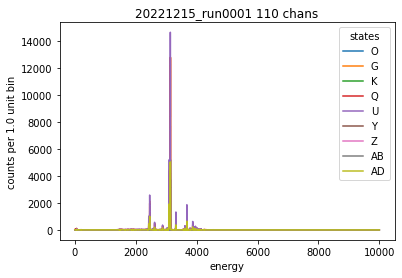

In [14]:
#realtime spectra, re-run this cell to refresh
refresh_and_print_if_worked()
fig = plt.figure()
ax = plt.gca()
data.plotHist( np.arange(0,10000,1), "energy", coAddStates=False, states=["O","G","K","Q","U","Y","Z","AB","AD"], axis=ax)

refresh worked, now have 3118932 pulses vs 3118850 before


/tmp/ipykernel_17091/2528670560.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seconds_after_external_triggers = np.hstack([ds.seconds_after_external_trigger[ds.getStatesIndicies(states=states_for_2dhist)] for ds in data.values()])


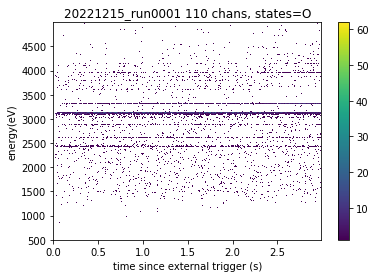

In [6]:
#realtime 2d specta, re-run this cell to refresh
refresh_and_print_if_worked()
external_trigger_filename =  os.path.join(d, f"{date}",f"{rn}", f"{date}_run{rn}_external_trigger.bin")
external_trigger_rowcount = ebit_util.get_external_triggers(external_trigger_filename, good_only=True)
for ds in data.values():
    ebit_util.calc_external_trigger_timing(ds, external_trigger_rowcount)

states_for_2dhist = "O"
energies = np.hstack([ds.getAttr("energy", states_for_2dhist) for ds in data.values()])
seconds_after_external_triggers = np.hstack([ds.seconds_after_external_trigger[ds.getStatesIndicies(states=states_for_2dhist)] for ds in data.values()])

plt.figure()
plt.hist2d(seconds_after_external_triggers, 
    energies, 
    bins=(np.arange(0,3,0.01), np.arange(500,5000,3)),cmin=1)
plt.xlabel("time since external trigger (s)")
plt.ylabel("energy(eV)")
plt.title(f"{data.shortName}, states={states_for_2dhist}")
plt.colorbar()


refresh worked, now have 3118946 pulses vs 3118932 before


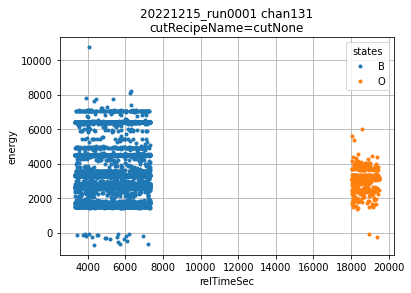

In [7]:
refresh_and_print_if_worked()
ds.plotAvsB("relTimeSec", "energy", states=["B","O"])
#ds.plotAvsB("relTimeSec","energy",states="C")
#plt.ylim(2600,2650)
plt.grid(True)

In [8]:
refresh_and_print_if_worked()
ds.statesDict


refresh worked, now have 3118954 pulses vs 3118946 before


OrderedDict([('A', slice(43, 9258, None)),
             ('B', slice(9258, 20257, None)),
             ('C', slice(20257, 20259, None)),
             ('D', slice(20640, 21597, None)),
             ('E', slice(21597, 21836, None)),
             ('F', slice(21836, 21837, None)),
             ('G', slice(21861, 23893, None)),
             ('H', slice(23893, 23893, None)),
             ('I', slice(23929, 25004, None)),
             ('J', slice(25004, 25005, None)),
             ('K', slice(25094, 25949, None)),
             ('L', slice(25949, 25949, None)),
             ('M', slice(25983, 27817, None)),
             ('N', slice(27817, 27819, None)),
             ('O', slice(28301, 28921, None)),
             ('P', slice(28921, 28921, None))])

In [9]:
ds.experimentStateFile.unaliasedLabels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P']

In [10]:
mass.off.ExperimentStateFile?

refresh worked, now have 3118957 pulses vs 3118954 before


/tmp/ipykernel_17091/2645496547.py:68: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  seconds_after_external_triggers = np.hstack([ds.seconds_after_external_trigger[ds.getStatesIndicies(states=states_for_2dhist)] for ds in data.values()])


He 0.0 counts
H 0.0 counts


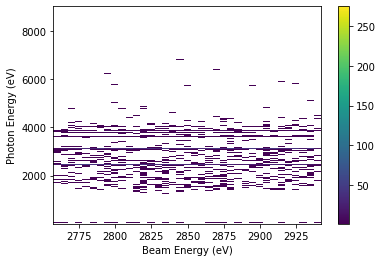

In [11]:
import math
import time
import numpy as np
from scipy.interpolate import interp1d
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

cook_time = 600.95 # cook time in ms
stack_period = 62 # stack period (duty cycle) in ms

v_ramp_t = [0,3,13,15,25,28,62] # DT timing points
v_ramp_v = [5000,3200,2600,2600,3200,5000,5000] # corresponding DT voltages in V

plot_energy_bounds = [0,10000] # [upper, lower] photon energy axis limits (eV)
plot_voltage_bounds = [2200,4990] # [upper, lower] beam energy axis limits (eV)

energy_bin = 2 # photon energy bins size (eV)
voltage_bin = 5 # beam energy bins size (eV)

I = 50 # ebeam current in mA

count_to_print = [[2220,3100,'He'],[2220,3200,'H']] # array of x,y values to count and label
count_radius = 20 # radius of count_to_print to be integrated

x_lims = [1000,5000]
y_lims = [1000,5000]

def sc_correct(vdata, e_curr): # data_arr and ebeam current in mA
    I = e_curr * 10**(-3) # beam current
    k = 8.99 * 10**(9) # Coulomb constant
    m = 9.11 * 10**(-31) # e- mass
    r = 2.5 * 10**(-3) # DT radius
    re = 200 * 10**(-6) # beam radius
    j2ev = 1.602 * 10**(-19) # J/eV aka e- charge
    f = 1 # multiplicative fudge factor, this should include the neutralization factor

    const = I*k/(math.sqrt(2/m))*(1+2*math.log(r/re)) *f

    vdata[:,2] -= const * (j2ev * vdata[:,2])**(-1/2)

    return vdata
def counts(x,y,r,xbins,ybins,vals):
    xshift = (xbins[1]-xbins[0])/2 # shift the bin values to the center
    yshift = (ybins[1]-ybins[0])/2
    xbins_shift = xbins + xshift
    ybins_shift = ybins + yshift

    xmatch = xbins_shift[(xbins_shift < x+r) & (xbins_shift > x-r)]
    ymatch = ybins_shift[(ybins_shift < y+r) & (ybins_shift > y-r)]
    pairs = [item for sublist in [[[i,j] for i in xmatch] for j in ymatch] for item in sublist]
    pairmatch = [i for i in pairs if ((i[0]-x)**2 + (i[1]-y)**2)**(.5) < r]

    pairmatch = [[i[0]-xshift,i[1]-yshift] for i in pairmatch] # shift back to bottom left
    indexpairs = [[np.argmin(abs(i[0]-xbins)),np.argmin(abs(i[1]-ybins))] for i in pairmatch]

    return np.nansum([vals[i[0],i[1]] for i in indexpairs])

#realtime 2d specta, re-run this cell to refresh
refresh_and_print_if_worked()
external_trigger_filename =  os.path.join(d, f"{date}",f"{rn}", f"{date}_run{rn}_external_trigger.bin")
external_trigger_rowcount = ebit_util.get_external_triggers(external_trigger_filename, good_only=True)
for ds in data.values():
    ebit_util.calc_external_trigger_timing(ds, external_trigger_rowcount)

states_for_2dhist = "O"
energies = np.hstack([ds.getAttr("energy", states_for_2dhist) for ds in data.values()])
seconds_after_external_triggers = np.hstack([ds.seconds_after_external_trigger[ds.getStatesIndicies(states=states_for_2dhist)] for ds in data.values()])


def plot2d():

    data = np.vstack((energies,seconds_after_external_triggers))
    data = data.T
    
    data = data[(data[:,0] > plot_energy_bounds[0]) & (data[:,0] <= plot_energy_bounds[1])] # truncate data out of energy bounds
    data[:,1] = (data[:,1] - cook_time) % stack_period # stack
    voltage_func = interp1d(v_ramp_t,v_ramp_v,kind='linear') # interpolated DT voltage function
    data = np.column_stack((data, data[:,1])) #adding a new column that will become DT voltage
    data[:,2] = voltage_func(data[:,2]) # voltage to time map
    data = data[(data[:,2] > plot_voltage_bounds[0]) & (data[:,2] <= plot_voltage_bounds[1])] # truncate data out of voltage bounds
    data = sc_correct(data,I) # apply space charge correction
    x_bins = np.arange(np.min(data[:,2]),np.max(data[:,2]+voltage_bin),voltage_bin)
    y_bins = np.arange(np.min(data[:,0]),np.max(data[:,0]+energy_bin),energy_bin)
    bin_data,x_edges,y_edges,_ = binned_statistic_2d(data[:,2], data[:,0], None, statistic='count', bins=[x_bins,y_bins])
    bin_data = np.ma.masked_array(bin_data,bin_data<1)
    fig = plt.figure()
    plt.xlabel('Beam Energy (eV)')
    plt.ylabel('Photon Energy (eV)')
    for count_loc in count_to_print:
        print(f'{count_loc[2]} {counts(count_loc[0], count_loc[1], count_radius, x_edges, y_edges, bin_data)} counts')
    plt.pcolormesh(x_edges,y_edges,bin_data.T)
    #plt.xlim(x_lims[0],x_lims[1])
    #plt.ylim(y_lims[0],y_lims[1])
    fig.canvas.draw()
    plt.colorbar()
    
plot2d()